In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [4]:
batch_size = 100
img_height = 250
img_width = 250

In [5]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\projects\z datasets\Accident Detection From CCTV Footage\data\train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\projects\z datasets\Accident Detection From CCTV Footage\data\test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\projects\z datasets\Accident Detection From CCTV Footage\data\val',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [6]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
from keras.applications.vgg16 import VGG16

In [8]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.VGG16(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

In [9]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 50)

Epoch 1/50
8/8 [==============================] - 23s 2s/step - loss: 2.9851 - accuracy: 0.5917 - val_loss: 0.6723 - val_accuracy: 0.6122
Epoch 2/50
8/8 [==============================] - 3s 342ms/step - loss: 0.4659 - accuracy: 0.7800 - val_loss: 0.3470 - val_accuracy: 0.8265
Epoch 3/50
8/8 [==============================] - 3s 338ms/step - loss: 0.2982 - accuracy: 0.8824 - val_loss: 0.2542 - val_accuracy: 0.8776
Epoch 4/50
8/8 [==============================] - 3s 342ms/step - loss: 0.1702 - accuracy: 0.9418 - val_loss: 0.1808 - val_accuracy: 0.9286
Epoch 5/50
8/8 [==============================] - 3s 338ms/step - loss: 0.1054 - accuracy: 0.9684 - val_loss: 0.1745 - val_accuracy: 0.9388
Epoch 6/50
8/8 [==============================] - 3s 339ms/step - loss: 0.0657 - accuracy: 0.9810 - val_loss: 0.1580 - val_accuracy: 0.9184
Epoch 7/50
8/8 [==============================] - 3s 338ms/step - loss: 0.0492 - accuracy: 0.9836 - val_loss: 0.1570 - val_accuracy: 0.9184
Epoch 8/50
8/8 [======

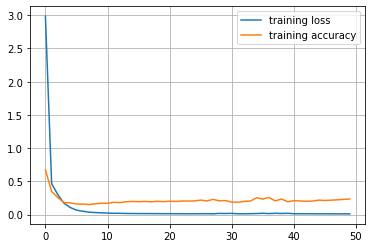

In [12]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'training accuracy')
plt.grid(True)
plt.legend()

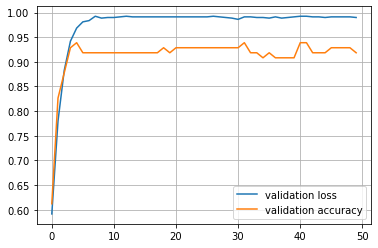

In [13]:
plt.plot(history.history['accuracy'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()